In [1]:
import numpy as np
from matplotlib import pyplot as  plt
from matplotlib import animation
from matplotlib import rc
from typing import Tuple, Mapping
from mpl_toolkits import mplot3d
import random

In [2]:
def my_plot_function(f: Mapping, title: str):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.axes(projection ='3d') 
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
  ax.view_init(40, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)

In [3]:
def my_plot_method(f: Mapping, title: str, log: list):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.axes(projection ='3d') 
  ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
  ax.view_init(80, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)
  ax.scatter(log[0][0], log[0][1], log[0][2], linewidths  = 5 , color='m',
             alpha = 1, label ='Начальная точка')
  ax.scatter(p_x, p_y, p_z, linewidths  = 5 , color='r', alpha = 1,
             label ='Найденный методом глобальный минимум')
  ax.scatter(0, 0, 0, linewidths  = 7 , color='b', alpha = 1, label ='Глобальный минимум')
  ax.legend(fontsize=12, loc='lower left')
  ax.plot3D(np.linspace(p_x, p_x, 2), np.linspace(p_y, p_y, 2),
            np.linspace(p_z, 20, 2), 'red')
  for i in range(0, len(log) - 1, 1):
    ax.plot3D(np.linspace(log[i][0], log[i+1][0] , 2), np.linspace(log[i][1],
    log[i+1][1], 2), np.linspace(log[i][2], log[i+1][2], 2), 'grey', alpha = 1)

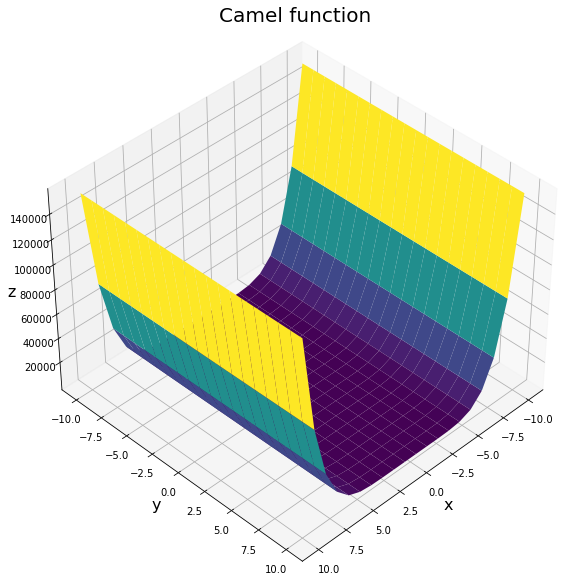

In [4]:
def Camel(x: np.array, y:np.array) -> np.float64:
  return 2 * x ** 2 - 1.05 * x ** 4 + 1/6 * x ** 6 + x * y + y ** 2
def Camel_dx(x: np.array, y:np.array) -> np.float64:
  return 4 * x - 4.2 * x ** 3 + x ** 5 + y
def Camel_dy(x: np.array, y:np.array) -> np.float64:
  return x + 2 * y
def LF_Camel_dx(F_train:np.array, x:np.array, y:np.array) -> np.float64:
  return 2 * Camel(x, y) * Camel_dx(x, y) - 2 * F_train * Camel_dx(x, y)
def LF_Camel_dy(F_train, x:np.array, y:np.array) -> np.float64:
  return 2 * Camel(x, y) * Camel_dy(x, y) - 2 * F_train * Camel_dy(x, y)

my_plot_function(Camel, 'Camel function')

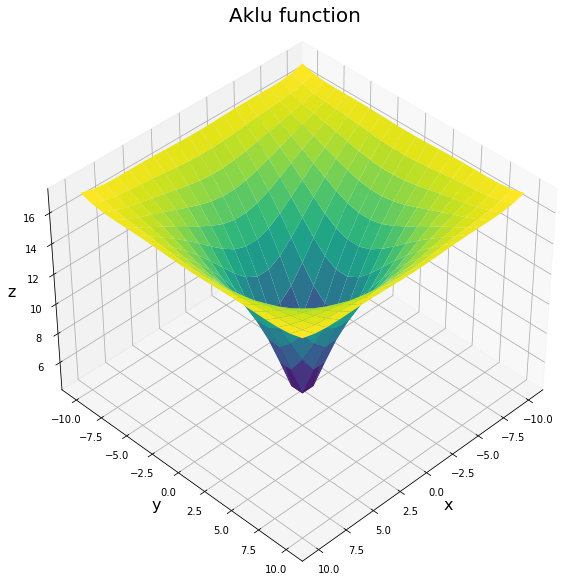

In [5]:
def Aklu(x: np.float32, y: np.float32) -> np.float64:
   
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (np.square(x) +np.square(y)))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20


def Aklu_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([((np.e**(-(np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2))))*(np.pi*np.sqrt(np.square(x)+np.square(y))* np.e**((np.cos(2*np.pi*x)+1)/2+np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2)))*np.sin(2*np.pi*x)+(2**(3/2))*x))/(np.sqrt(np.square(x)+np.square(y)))), (np.e**(-(np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2))))*(np.pi*np.sqrt(np.square(x)+np.square(y))*np.e**((np.cos(2*np.pi*y)+1)/2+np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2)))*np.sin(2*np.pi*y)+(2**(3/2))*y))/np.sqrt(np.square(x)+np.square(y))]);
Aklu(2, 3), Aklu_Grad(2, 3)
my_plot_function(Aklu, 'Aklu function')

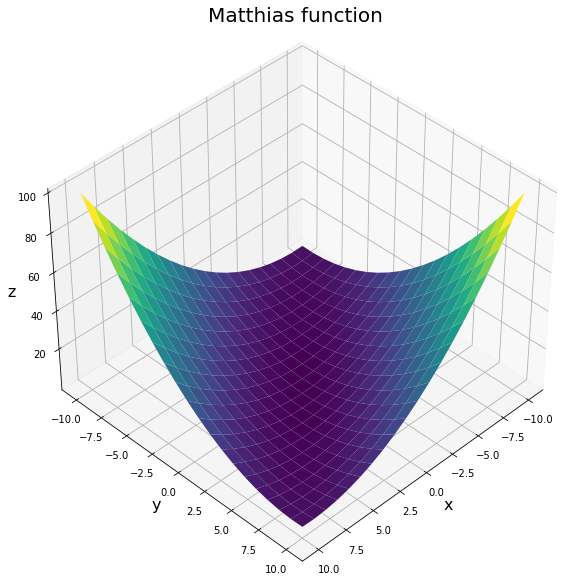

In [44]:
def Matias(x: np.array, y:np.array) -> np.float64:
  return 0.26*(x*x + y*y) - 0.48*x*y
def Matias_dfdx(x: np.array, y:np.array) -> np.float64:
  return 0.52 * x - 0.48 * y
def Matias_dfdy(x: np.array, y:np.array) -> np.float64:
  return 0.52 * y - 0.48 * x
def LF_Matias_dx(F_train:np.array, x:np.array, y:np.array) -> np.float64:
  return -2 * F_train * (0.52*x - 0.48*y) + 2 * (0.52*x - 0.48*y)
def LF_Matias_dy(F_train:np.array, x:np.array, y:np.array) -> np.float64:
  return -2 * F_train * (-0.48*x + 0.52*y) + 2 * (-0.48*x + 0.52*y)

my_plot_function(Matias, 'Matthias function')

In [45]:
def my_GD(f: Mapping, dfdx:Mapping, dfdy:Mapping, x0: np.ndarray, lr: float = 0.01, \
          T:int = 1) -> Tuple [np.ndarray, np.float32]:
  """
  f - функционал для оптимизации
  df - градиент оптимизируемого функционала
  x0 - стартовая точки
  lr - скорость обучения
  T - количество итераций
  вернет: (x_optimal, f(x_optimal))
  """
  point_old_x = x0[0]
  point_old_y = x0[1]

  for i in range (T):
    point_new_x = point_old_x - lr * dfdx(point_old_x, point_old_y)
    point_new_y = point_old_y - lr * dfdy(point_old_x, point_old_y)
    point_old_x = point_new_x
    point_old_y = point_new_y
    log.append([point_old_x.copy(), point_old_y.copy(), f(point_old_x, point_old_y)])
  return point_new_x, point_new_y, f(point_new_x, point_new_y)

Градиентный спуск
Начальная точка: x0 = 1 , y0 = 10 
Точка глобального минимума: xt = 0.09993120244574184 , yt = 0.09993120244574184 
Значение функции в точке глобального минимума: f(xt, yt) = 0.00039944980889007435


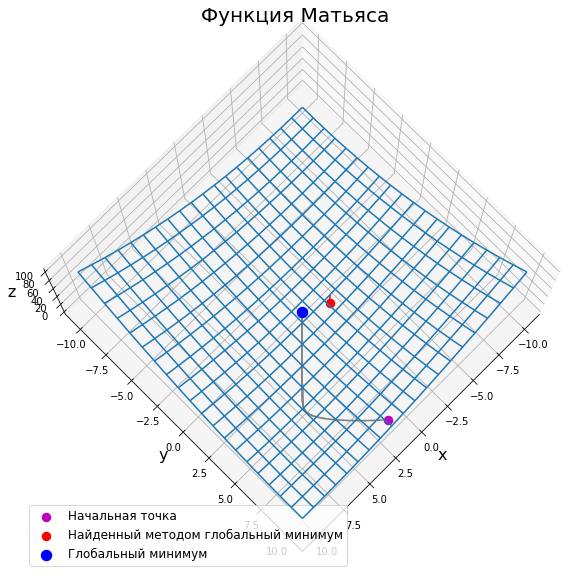

In [46]:
log = list()
x, y, z = my_GD(Matias, Matias_dfdx, Matias_dfdy, np.array([1, 10]), lr = 0.1, T = 1000)
print("Градиентный спуск\nНачальная точка: x0 =", 1, ", y0 =", 10,
      "\nТочка глобального минимума: xt =", x, ", yt =", y,
      "\nЗначение функции в точке глобального минимума: f(xt, yt) =", z)
my_plot_method(Matias, 'Функция Матьяса', log)

Градиентный спуск
Начальная точка: x0 = 4 , y0 = 10 
Точка глобального минимума: xt = -1.7475523486620301 , yt = 0.8737762019423149 
Значение функции в точке глобального минимума: f(xt, yt) = 0.2986384422368613


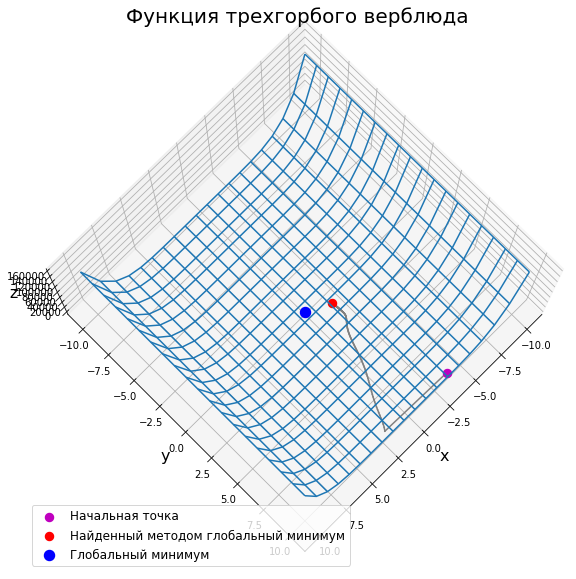

In [47]:
log = list()
x, y, z = my_GD(Camel, Camel_dx, Camel_dy, np.array([4, 10]), lr = 0.01, T = 1000)
print("Градиентный спуск\nНачальная точка: x0 =", 4, ", y0 =", 10,
      "\nТочка глобального минимума: xt =", x, ", yt =", y,
      "\nЗначение функции в точке глобального минимума: f(xt, yt) =", z)
my_plot_method(Camel, 'Функция трехгорбого верблюда', log)

In [48]:
def my_SGD(f: Mapping, dx: Mapping, dy: Mapping, log: list,
  x0: float = random.randint(-100, 100), y0: float = random.randint(-100, 100),
  count_epochs: int = 100, size_batch: int = 100, lr: float = 0.1,
  count_points: int = 100) -> Tuple [np.float32, np.float32, np.float32]:
  """
    Функция принимает:
    f - функция, задающая поверхность
    dx - функция потерь, дифференцированная по x
    dy - функция потерь, дифференцированная по y
    x0 - координаты начальной точки по x (default: randomInt[-100, 100])
    y0 - координаты начальной точки по y (default: randomInt[-100, 100])
    count_epochs - количество эпох обучения (default: 100)
    size_batch - размер 1-го бача (default: 100)
    lr - коэффициент скорости обучения (default: 0.1)
    count_points - количество точек поверхности ** 2 (default: 100)

    Функция возвращает:
    tuple, включающий в себя: координаты сгенерированной случайно начальной точки,
    координаты полученной точки глобального минимума, значение функции в найденной
    точке глобального минимума.
  """

  size_dataset = count_points ** 2
  count_batch = size_dataset // size_batch

  x_train, y_train = np.meshgrid(np.linspace(-1, 1, count_points),
                                 np.linspace(-1, 1, count_points))
  x_train = x_train.reshape(count_points * count_points, )
  y_train = y_train.reshape(count_points * count_points, )

  xt = x0
  yt = y0
  log.append([xt, yt, f(xt, yt)])
  for epoch in range(count_epochs):
    rd = np.arange(size_dataset)
    np.random.shuffle(rd)
    x_train, y_train = x_train[rd], y_train[rd]
    for batch in range(count_batch - 1):
      x_batch = x_train[batch * size_batch : (batch + 1) * size_batch]
      y_batch = y_train[batch * size_batch : (batch + 1) * size_batch]

      buf_xt = xt - lr * (dx(f(x_batch, y_batch), xt, yt)).mean()
      buf_yt = yt - lr * (dy(f(x_batch, y_batch), xt, yt)).mean()
      xt = buf_xt.copy()
      yt = buf_yt.copy()
      log.append([xt.copy(), yt.copy(), f(xt, yt)])
  return x0, y0, xt, yt, f(xt, yt)

Алгоритм SGD
Начальная точка: x0 = 10 , y0 = -7 
Точка глобального минимума: xt = 5.873676873068264e-29 , yt = 5.873676873068264e-29 
Глобальный минимум: f(xt, yt) = 1.3800032003686807e-58


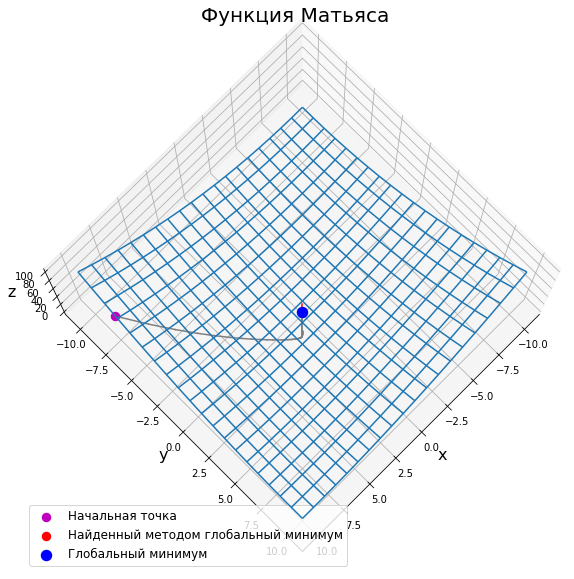

In [49]:
log_SGD = list()
x0, y0, p_x, p_y, p_z = my_SGD(Matias, LF_Matias_dx, LF_Matias_dy, log_SGD, 10, -7)
print("Алгоритм SGD\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Matias, 'Функция Матьяса', log_SGD)

In [50]:
def my_SGD_Momentum(f: Mapping, dx: Mapping, dy: Mapping, log: list,
  x0: float = random.randint(-100, 100), y0: float = random.randint(-100, 100),
  count_epochs: int = 10, size_batch: int = 100, beta: float = 0.9,
  count_points: int = 100) -> Tuple [np.float64, np.float64, np.float64]:
  """
    Функция принимает:
    f - функция, задающая поверхность
    dx - функция потерь, дифференцированная по x
    dy - функция потерь, дифференцированная по y
    x0 - координаты начальной точки по x (default: randomInt[-100, 100])
    y0 - координаты начальной точки по y (default: randomInt[-100, 100])
    count_epochs - количество эпох обучения (default: 100)
    size_batch - размер 1-го бача (default: 100)
    beta - коэффициент скорости обучения (default: 0.9)
    count_points - количество точек поверхности ** 2 (default: 100)

    Функция возвращает:
    tuple, включающий в себя: координаты сгенерированной случайно начальной точки,
    координаты полученной точки глобального минимума, значение функции в найденной
    точке глобального минимума.
  """

  size_dataset = count_points ** 2
  count_batch = size_dataset // size_batch

  x_train, y_train = np.meshgrid(np.linspace(-1, 1, count_points), 
                                 np.linspace(-1, 1, count_points))
  x_train = x_train.reshape(count_points * count_points, )
  y_train = y_train.reshape(count_points * count_points, )

  xt = x0
  yt = y0
  log.append([xt, yt, f(xt, yt)])
  for epoch in range(count_epochs):
    rd = np.arange(size_dataset)
    np.random.shuffle(rd)
    x_train, y_train = x_train[rd], y_train[rd]
    for batch in range(count_batch - 1):
      x_batch = x_train[batch * size_batch : (batch + 1) * size_batch]
      y_batch = y_train[batch * size_batch : (batch + 1) * size_batch]

      buf_xt = xt * beta - (1 - beta) * (dx(f(x_batch, y_batch), xt, yt)).mean()
      buf_yt = yt * beta - (1 - beta) * (dy(f(x_batch, y_batch), xt, yt)).mean()
      xt = buf_xt.copy()
      yt = buf_yt.copy()
      log.append([xt.copy(), yt.copy(), f(xt, yt)])
  return x0, y0, xt, yt, f(xt, yt)

Алгоритм SGD Momentum
Начальная точка: x0 = 10 , y0 = -7 
Точка глобального минимума: xt = 5.2344046768223255e-49 , yt = 5.2344046768223255e-49 
Глобальный минимум: f(xt, yt) = 1.0959596928295786e-98


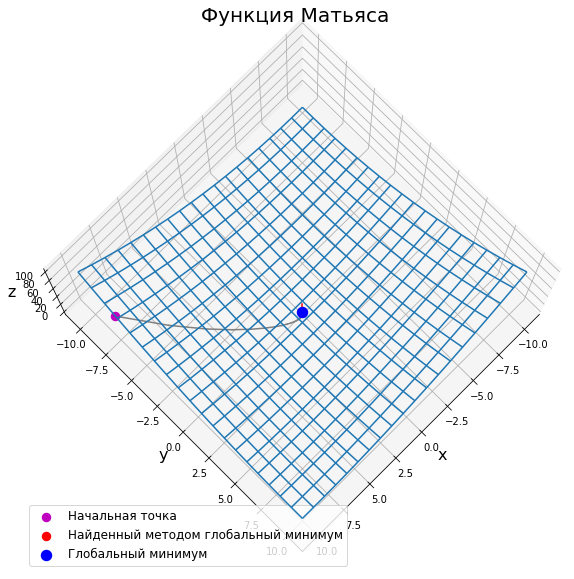

In [51]:
log_Moment = list()
x0, y0, p_x, p_y, p_z = my_SGD_Momentum(Matias, LF_Matias_dx, LF_Matias_dy,
                                        log_Moment, 10, -7)
print("Алгоритм SGD Momentum\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Matias, "Функция Матьяса", log_Moment)

Алгоритм SGD Momentum
Начальная точка: x0 = -1 , y0 = 1 
Точка глобального минимума: xt = -0.49012717908608333 , yt = -0.29851697409470523 
Глобальный минимум: f(xt, yt) = 0.657590168191268


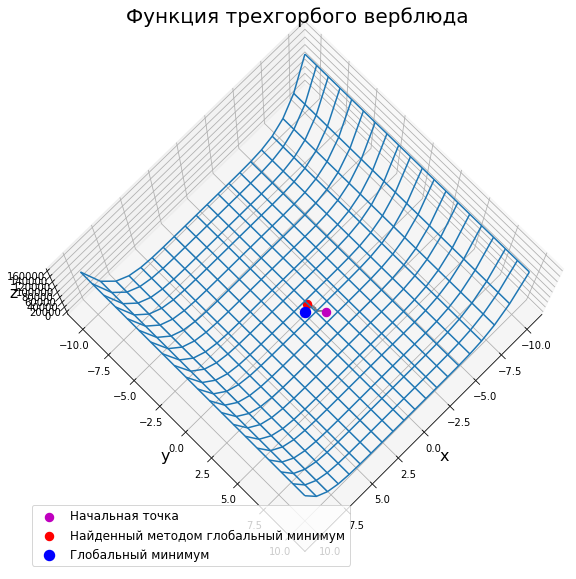

In [52]:
log = list()
x0, y0, p_x, p_y, p_z = my_SGD_Momentum(Camel, LF_Camel_dx, LF_Camel_dy, log, -1, 1)
print("Алгоритм SGD Momentum\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Camel, "Функция трехгорбого верблюда", log)

In [53]:
def my_SGD_ADAM(f: Mapping, dx: Mapping, dy: Mapping, log: list,
  x0: float = random.randint(-100, 100), y0: float = random.randint(-100, 100),
  count_epochs: int = 100, size_batch: int = 100, lr: float = 0.1, beta1: float = 0.9,
  beta2: float = 0.99, eps: float = 1e-8, count_points: int = 100) \
  -> Tuple [np.float32, np.float32, np.float32]:
  """
    Функция принимает:
    f - функция, задающая поверхность
    dx - функция потерь, дифференцированная по x
    dy - функция потерь, дифференцированная по y
    x0 - координаты начальной точки по x (default: randomInt[-100, 100])
    y0 - координаты начальной точки по y (default: randomInt[-100, 100])
    count_epochs - количество эпох обучения (default: 100)
    size_batch - размер 1-го бача (default: 100)
    lr - коэффициент скорости обучения (default: 0.1)
    beta1 - параметр (default: 0.9)
    beta2 - параметр (default: 0.99)
    eps - параметр (default: 1e-8)
    count_points - количество точек поверхности ** 2 (default: 100)

    Функция возвращает:
    tuple, включающий в себя: координаты сгенерированной случайно начальной точки,
    координаты полученной точки глобального минимума, значение функции в найденной
    точке глобального минимума.
  """
  size_dataset = count_points ** 2
  count_batch = size_dataset // size_batch

  x_train, y_train = np.meshgrid(np.linspace(-1/10, 1/10, count_points),
                                 np.linspace(-1/10, 1/10, count_points))
  x_train = x_train.reshape(count_points * count_points, )
  y_train = y_train.reshape(count_points * count_points, )

  xt = x0
  yt = y0
  vtx, vty = 0, 0
  Gtx, Gty = 0, 0

  log.append([xt, yt, f(xt, yt)])
  for epoch in range(count_epochs):
    rd = np.arange(size_dataset)
    np.random.shuffle(rd)
    x_train, y_train = x_train[rd], y_train[rd]
    for batch in range(count_batch - 1):
      x_batch = x_train[batch * size_batch : (batch + 1) * size_batch]
      y_batch = y_train[batch * size_batch : (batch + 1) * size_batch]

      grad_x = dx(f(x_batch, y_batch), xt, yt).mean()
      grad_y = dy(f(x_batch, y_batch), xt, yt).mean()

      vtx = beta1 * vtx + (1 - beta1) * grad_x
      vty = beta1 * vty + (1 - beta1) * grad_y
      Gtx = beta2 * Gtx + (1 - beta2) * (grad_x) ** 2
      Gty = beta2 * Gty + (1 - beta2) * (grad_y) ** 2

      xt = xt - lr * vtx / (Gtx + eps) ** (1 / 2)
      yt = yt - lr * vty / (Gty + eps) ** (1 / 2)

      log.append([xt.copy(), yt.copy(), f(xt, yt)])
  return x0, y0, xt, yt, f(xt, yt)

Алгоритм SGD ADAM
Начальная точка: x0 = 10 , y0 = -7 
Точка глобального минимума: xt = -0.0008639710130918257 , yt = 0.0008639710130918257 
Глобальный минимум: f(xt, yt) = 7.464459114629157e-07


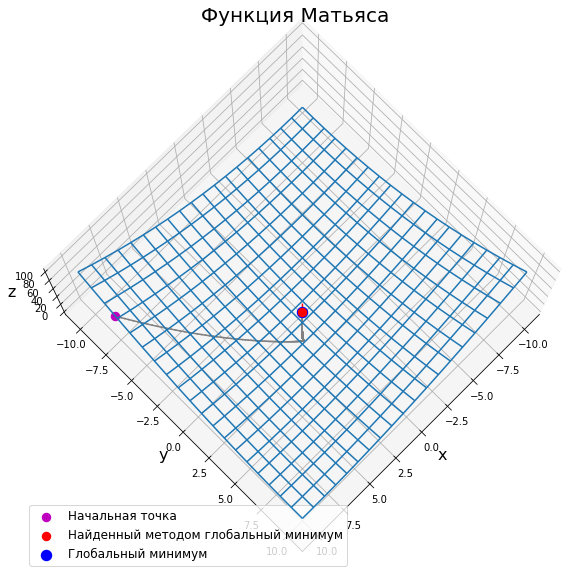

In [54]:
log_ADAM = list()
x0, y0, p_x, p_y, p_z = my_SGD_ADAM(Matias, LF_Matias_dx, LF_Matias_dy, log_ADAM, 10, -7)
print("Алгоритм SGD ADAM\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Matias, "Функция Матьяса", log_ADAM)

Алгоритм SGD ADAM
Начальная точка: x0 = -13 , y0 = 8 
Точка глобального минимума: xt = -1.7456850886330022 , yt = 0.8757970676419747 
Глобальный минимум: f(xt, yt) = 0.29866741860909884


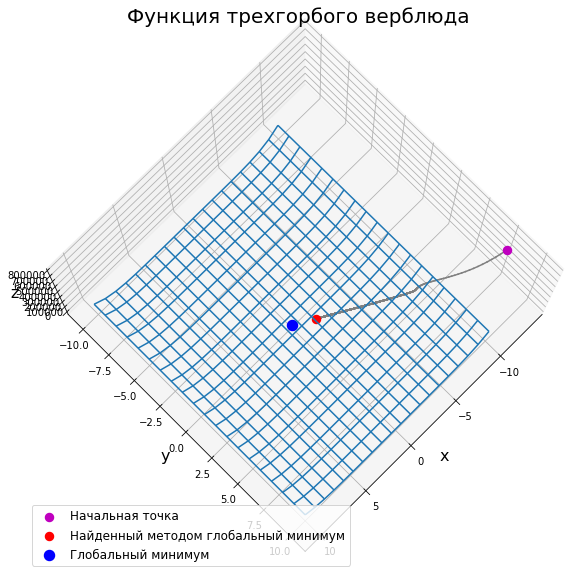

In [55]:
log = list()
x0, y0, p_x, p_y, p_z = my_SGD_ADAM(Camel, LF_Camel_dx, LF_Camel_dy, log, -13, 8)
print("Алгоритм SGD ADAM\nНачальная точка: x0 =", x0, ", y0 =", y0,
      "\nТочка глобального минимума: xt =", p_x, ", yt =", p_y,
      "\nГлобальный минимум: f(xt, yt) =", p_z)
my_plot_method(Camel, "Функция трехгорбого верблюда", log)